In [91]:
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [44]:
iris=datasets.load_iris()
X=iris.data[:,2:4]
y=iris.target

In [61]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [98]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [74]:
svm_clf=SVC(kernel="linear",C=float("inf"))
svm_clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
svm_clf.coef_
svm_clf.intercept_

array([[1.29411744, 0.82352928]])

In [155]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [156]:
svm_clf

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [159]:
from sklearn.datasets import make_moons

In [161]:
X,y=make_moons(n_samples=100,noise=0.15,random_state=42)

In [166]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

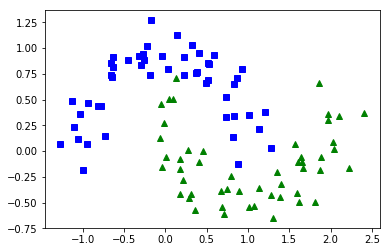

In [169]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')

In [232]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
X,y=make_moons(n_samples=100,noise=0.15,random_state=42)

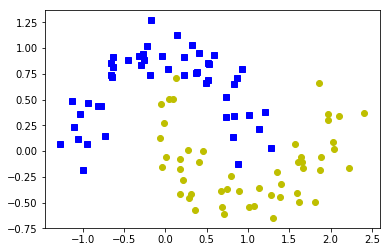

In [234]:
plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],X[:,1][y==1],'yo')

In [28]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [29]:
X.shape

(100, 2)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [237]:
polynomial_svm_clf = Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge'))
])
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

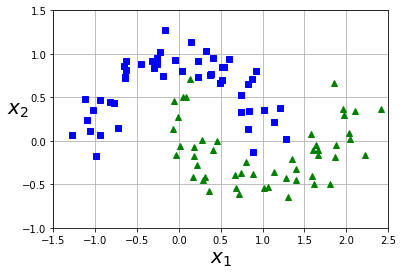

In [32]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

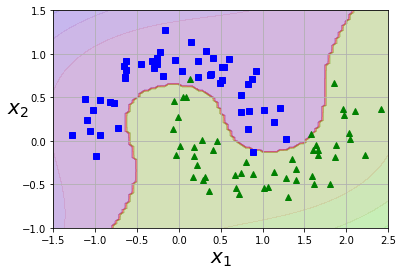

In [33]:
import numpy as np
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [84]:
y_decision = polynomial_svm_clf.decision_function(X).reshape(x0.shape)

In [24]:
import numpy as np
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [83]:
nx,ny = (3,2)

In [84]:
x = np.linspace(0,1,nx)
y = np.linspace(0,1,ny)

In [11]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [8]:
X,y=make_moons(n_samples=100,noise=0.15,random_state=42)

[-1.5, 2.5, -1, 1.5]

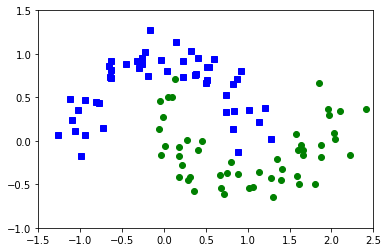

In [12]:
plt.plot(X[:,0][y==0],x[:,1][y==0],'bs')
plt.plot(X[:,0][y==1],x[:,1][y==1],'go')
plt.axis([-1.5,2.5,-1,1.5])

In [39]:
x0s = np.linspace(-1.5,2.5,100)
x1s = np.linspace(-1,1.5,100)
x0,x1 = np.meshgrid(x0s,x1s)

In [40]:
X=np.c_[x0.ravel(),x1.ravel()]

In [41]:
y_pred=polynomial_svm_clf.predict(X).reshape(x0.shape)

In [42]:
y_pred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [224]:
y_decision=polynomial_svm_clf.decision_function(X).reshape(x0.shape)

In [58]:
y_pred[0:2,:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [62]:
x0[0:2,:].shape

(2, 100)

In [80]:
import pandas as pd

In [82]:
pd.Series(y_pred[0:2,:][0]).value_counts()

1    82
0    18
dtype: int64

In [92]:
y_decision[0:2,:]

array([[-1.95168815e+01, -1.80617418e+01, -1.66529021e+01,
        -1.52894273e+01, -1.39703822e+01, -1.26948318e+01,
        -1.14618409e+01, -1.02704744e+01, -9.11979715e+00,
        -8.00887410e+00, -6.93677010e+00, -5.90255004e+00,
        -4.90527879e+00, -3.94402125e+00, -3.01784230e+00,
        -2.12580681e+00, -1.26697968e+00, -4.40425780e-01,
         3.54790002e-01,  1.11960278e+00,  1.85494768e+00,
         2.56175981e+00,  3.24097429e+00,  3.89352623e+00,
         4.52035076e+00,  5.12238299e+00,  5.70055804e+00,
         6.25581102e+00,  6.78907705e+00,  7.30129125e+00,
         7.79338874e+00,  8.26630463e+00,  8.72097403e+00,
         9.15833208e+00,  9.57931387e+00,  9.98485453e+00,
         1.03758892e+01,  1.07533529e+01,  1.11181809e+01,
         1.14713082e+01,  1.18136700e+01,  1.21462013e+01,
         1.24698373e+01,  1.27855132e+01,  1.30941639e+01,
         1.33967247e+01,  1.36941307e+01,  1.39873169e+01,
         1.42772185e+01,  1.45647706e+01,  1.48509083e+0

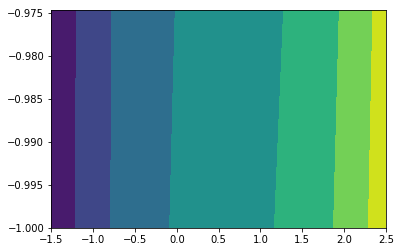

In [90]:
plt.contourf(x0[0:2,:],x1[0:2,:],y_decision[0:2,:])

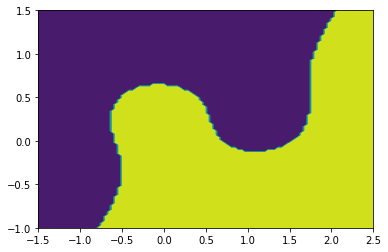

In [227]:
plt.contourf(x0,x1,y_pred)

TypeError: Input z must be at least a 2x2 array.

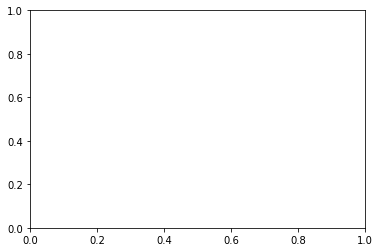

In [254]:
plt.contourf(x0[0].reshape(100,1),x1[0].reshape(100,1),y_decision[0].reshape(100,1))